In [15]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [16]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

In [295]:
test = pd.read_csv("../../../resources/data/titanic/test.csv")
train = pd.read_csv("../../../resources/data/titanic/train.csv")

In [18]:

#combine = pd.concat([train.drop('Survived',1),test])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


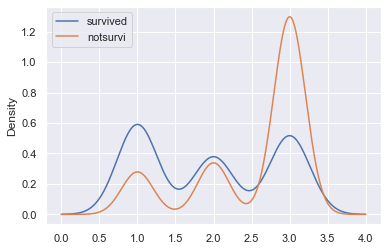

In [38]:
train[train['Survived']==1]['Pclass'].plot.kde(label='survived')
train[train['Survived']==0]['Pclass'].plot.kde(label='notsurvi')
plt.legend()

In [40]:
train['Survived'].sum()/len(train['Survived'])

0.3838383838383838

we are searching for densitity function (likelihood function):
$$P(x|y=survive)$$ and $$P(x|y=non-survive)$$

in order to find $$P(y=survive|x) = p(y=survive)p(x|y_survive)$$

In [41]:
from scipy.stats import norm


In [107]:
describe_non_survived = train[train['Survived']==0].describe()
describe_survived = train[train['Survived']==1].describe()
#mean = 
#norm()
describe['Pclass']['mean']
describe['Pclass']['std']

0.735805045458566

In [61]:
gausian = norm.pdf(x= train['Survived'],scale=describe['Pclass']['std'] ,loc = describe['Pclass']['mean'])

In [67]:
snd = norm(loc=describe['Pclass']['mean'], scale=describe['Pclass']['std'])

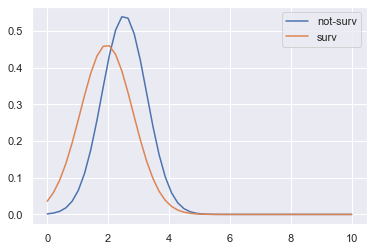

In [147]:
mu = describe_non_survived['Pclass']['mean']
sigma = describe_non_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma),label='not-surv')
mu = describe_survived['Pclass']['mean']
sigma = describe_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma),label='surv')
plt.legend()

In [112]:
def gausian(x, mu, sigma):
    c = 1/(2*np.pi*sigma**2)**(1/2)
    return c*np.exp( - (x - mu)**2/(2*sigma**2) )

In [114]:
not_survive_norm_likhood = gausian(1,describe_non_survived['Pclass']['mean'],describe_non_survived['Pclass']['std'])

In [120]:
prob_y = train['Survived'].sum()/len(train['Survived'])
prob_not_y = 1 - prob_y

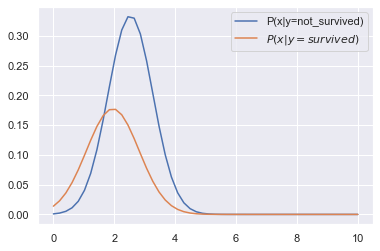

In [155]:
mu = describe_non_survived['Pclass']['mean']
sigma = describe_non_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma)*prob_not_y,label='P(x|y=not_survived)')
mu = describe_survived['Pclass']['mean']
sigma = describe_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma)*prob_y,label=r'$P(x|y=survived)$')
plt.legend()

In [122]:
print(type( describe_survived['Pclass']))

<class 'pandas.core.series.Series'>


We will make a function that calculate likelihood(ProbabilityDensityFunction)PDF
for feature class 'Pclass' in order to calucate baysen estimation

In [139]:
def likelihood_function(feature_describe):
    """
    feature_describe : pandas Series
    
    """
    
    sigma= feature_describe['std']
    mu = feature_describe['mean']
    
    def pdf(x):
        """
        """
        print('sigma',sigma)
        return norm.pdf(x, mu, sigma)
    
    
    return pdf

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

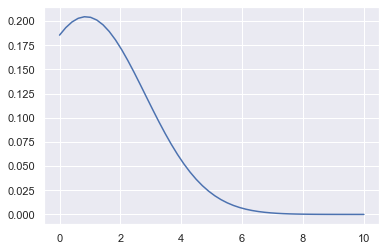

In [132]:
plt.plot(x,y,label='surv')

sigma 0.8633206211472314
sigma 0.735805045458566


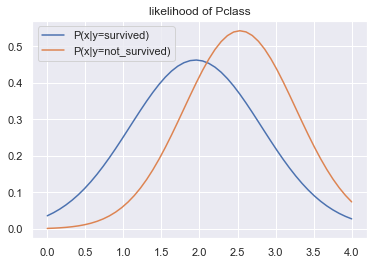

In [157]:
x = np.linspace(0,4)
y = likelihood_function(describe_survived['Pclass'])(x)
y_1 = likelihood_function(describe_non_survived['Pclass'])(x)
plt.plot(x,y,label='P(x|y=survived)')
plt.plot(x,y_1,label=r'P(x|y=not_survived)')
plt.title('likelihood of Pclass')
plt.legend()

In [151]:
likelihood_function(describe_survived['Pclass'])([0,1,2,3])

sigma 0.8633206211472314


array([0.03602134, 0.25213648, 0.46133678, 0.22065161])

In [152]:
likelihood_function(describe_non_survived['Pclass'])([0,1,2,3])

sigma 0.735805045458566


array([0.00145572, 0.06208117, 0.41752787, 0.44284842])

In [159]:
prob_not_y 

0.6161616161616161

sigma 0.8633206211472314
sigma 0.735805045458566


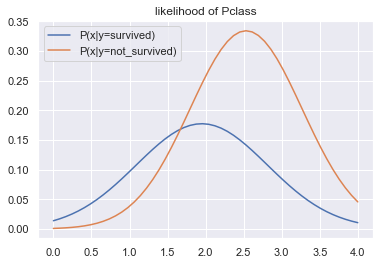

In [158]:
x = np.linspace(0,4)
y = likelihood_function(describe_survived['Pclass'])(x)*prob_y 
y_1 = likelihood_function(describe_non_survived['Pclass'])(x)*prob_not_y 
plt.plot(x,y,label='P(x|y=survived)')
plt.plot(x,y_1,label=r'P(x|y=not_survived)')
plt.title('likelihood of Pclass')
plt.legend()

In [160]:
likelihood_function(describe_non_survived['Pclass'])([0,1,2,3])*prob_not_y 

sigma 0.735805045458566


array([0.00089696, 0.03825204, 0.25726465, 0.2728662 ])

In [161]:
likelihood_function(describe_survived['Pclass'])([0,1,2,3])*prob_y 

sigma 0.8633206211472314


array([0.01382637, 0.09677966, 0.17707876, 0.08469456])

In [176]:
def predict(x,sigma, mu,prob_y,sigma_not, mu_not,prob_y_not ):
    yes = norm.pdf(x, mu, sigma)*prob_y
    no = norm.pdf(x, mu_not, sigma_not)*prob_y_not
    return {"survive LikeliH":yes,"not_survive LikeliH":yes}

In [174]:
type(train['Pclass'])
train['Pclass'].apply(predict,a='fuck')

0      (3, fuck)
1      (1, fuck)
2      (3, fuck)
3      (1, fuck)
4      (3, fuck)
         ...    
886    (2, fuck)
887    (1, fuck)
888    (3, fuck)
889    (1, fuck)
890    (3, fuck)
Name: Pclass, Length: 891, dtype: object

In [ ]:
def likelihood(x,sigma,mu)

In [182]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [300]:
#def likelihood_vars(x, y):
    
y_train = train['Survived'] 
x_train = train.drop('Survived',axis=1)
y_train.unique()
train['Sex'] = (train['Sex']=='male').astype(int)

In [301]:
'''
   label = 'Survived'
   feature = 'Pclass'
  
  ''' 

def get_stats(data, label, feature):
    result = {}
    for i in train[label].unique():
        stats = train[train[label] == i].describe()[feature]
        result[i] = stats[[1,2]]
    
    return result
    

In [243]:
stats = get_stats(train, label = 'Survived',  feature = 'Pclass')

In [221]:
for label_value in stats.keys():
    print(stats[label_value]['mean'])

2.5318761384335153
1.9502923976608186


In [281]:
def predict(x_test, stats):
    pass



def calculate(x, label_stats, prob):
    predict = None
    weight = 0
    #print(f"x={x}")
    for label_value in label_stats:
        sigma = label_stats[label_value]['std']
        mu = label_stats[label_value]['mean']
        likelihood = norm.pdf(x, mu, sigma)
        bayes = likelihood*prob[label_value]
        #print(label_value, bayes)
        if weight<=bayes:
            weight=bayes
            #print(f'weigh{weight}')
            predict = label_value
            
            
    return  predict
        

    
   
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])
 

In [282]:
stats = get_stats(train, label = 'Survived',  feature = 'Pclass')
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])

result = train[feature].apply(calculate, label_stats=stats,prob = prob )

In [283]:
result

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Pclass, Length: 891, dtype: int64

In [284]:
from sklearn.metrics import accuracy_score

In [285]:
accuracy_score(result, train[label])

0.6790123456790124

In [ ]:
accuracy_score(result, train[label])

In [304]:
stats = get_stats(train, label = 'Survived',  feature = 'Sex')

In [305]:
stats


{0: mean    0.852459
 std     0.354968
 Name: Sex, dtype: float64,
 1: mean    0.318713
 std     0.466660
 Name: Sex, dtype: float64}

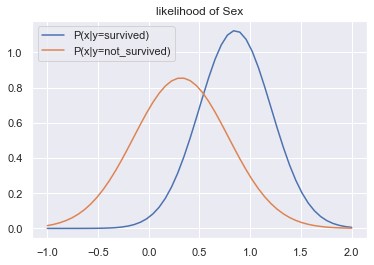

In [309]:
x = np.linspace(-1,2)
yes = norm.pdf(x,stats[0]['mean'], stats[0]['std'])
no = norm.pdf(x,stats[1]['mean'], stats[1]['std'])
plt.plot(x,yes,label='P(x|y=survived)')
plt.plot(x,no,label=r'P(x|y=not_survived)')
plt.title('likelihood of Sex')
plt.legend()

In [311]:
stats = get_stats(train, label = 'Survived',  feature = 'Sex')
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])

result = train[feature].apply(calculate, label_stats=stats,prob = prob )
result

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [312]:
accuracy_score(result, train[label])

0.7867564534231201